# JAMBOREE EDUCATION CASE STUDY

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Problem Statement

What factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## Column Profiling:

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

# Importing Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [114]:
%matplotlib inline

In [2]:
df = pd.read_csv("Jamboree_Admission.csv")

# Statistical Summary

In [43]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [54]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Non Graphical Analysis

In [37]:
for i in columns[1:]:
    print("Column Name :" , i)
    print(df[i].value_counts(normalize = True)*100)
    print("\n\n")

Column Name : GRE Score
312    4.8
324    4.6
316    3.6
321    3.4
322    3.4
327    3.4
314    3.2
311    3.2
320    3.2
317    3.0
325    3.0
315    2.6
308    2.6
323    2.6
318    2.4
319    2.4
326    2.4
304    2.4
300    2.4
313    2.4
310    2.2
305    2.2
301    2.2
329    2.0
307    2.0
299    2.0
298    2.0
309    1.8
340    1.8
331    1.8
328    1.8
330    1.6
332    1.6
334    1.6
306    1.4
302    1.4
297    1.2
296    1.0
303    1.0
336    1.0
295    1.0
335    0.8
333    0.8
338    0.8
339    0.6
337    0.4
294    0.4
290    0.4
293    0.2
Name: GRE Score, dtype: float64



Column Name : TOEFL Score
110    8.8
105    7.4
104    5.8
112    5.6
107    5.6
106    5.6
103    5.0
102    4.8
100    4.8
99     4.6
111    4.0
101    4.0
113    3.8
109    3.8
108    3.8
114    3.6
116    3.2
115    2.2
119    2.0
98     2.0
118    2.0
120    1.8
117    1.6
97     1.4
96     1.2
95     0.6
94     0.4
93     0.4
92     0.2
Name: TOEFL Score, dtype: float64



Column Name : Univer

In [42]:
for i in columns[1:]:
    print( i," : " , df[i].nunique())

GRE Score  :  49
TOEFL Score  :  29
University Rating  :  5
SOP  :  9
LOR   :  9
CGPA  :  184
Research  :  2
Chance of Admit   :  61


In [52]:
for i in columns[1:]:
    print( i," :" , df[i].unique())
    print("\n")

GRE Score  : [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]


TOEFL Score  : [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]


University Rating  : [4 3 2 5 1]


SOP  : [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]


LOR   : [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]


CGPA  : [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 

### Insight : 
### Categorical columns : 'University Rating', 'SOP', 'LOR ', 'Research'
### Continous Columns   :'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '

In [58]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### There are no Null Values

In [64]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Graphical Analysis

##  Univariate Analysis 

In [65]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [89]:
cat_columns = columns[3:6]

In [90]:
cat_columns = list(cat_columns)

In [91]:
cat_columns.append("Research")


In [98]:
continous_columns = columns.copy()

In [103]:
continous_columns = list(continous_columns)

In [108]:
continous_columns = [i for i in continous_columns if i not in cat_columns]

In [109]:
cat_columns

['University Rating', 'SOP', 'LOR ', 'Research']

In [111]:
continous_columns

['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

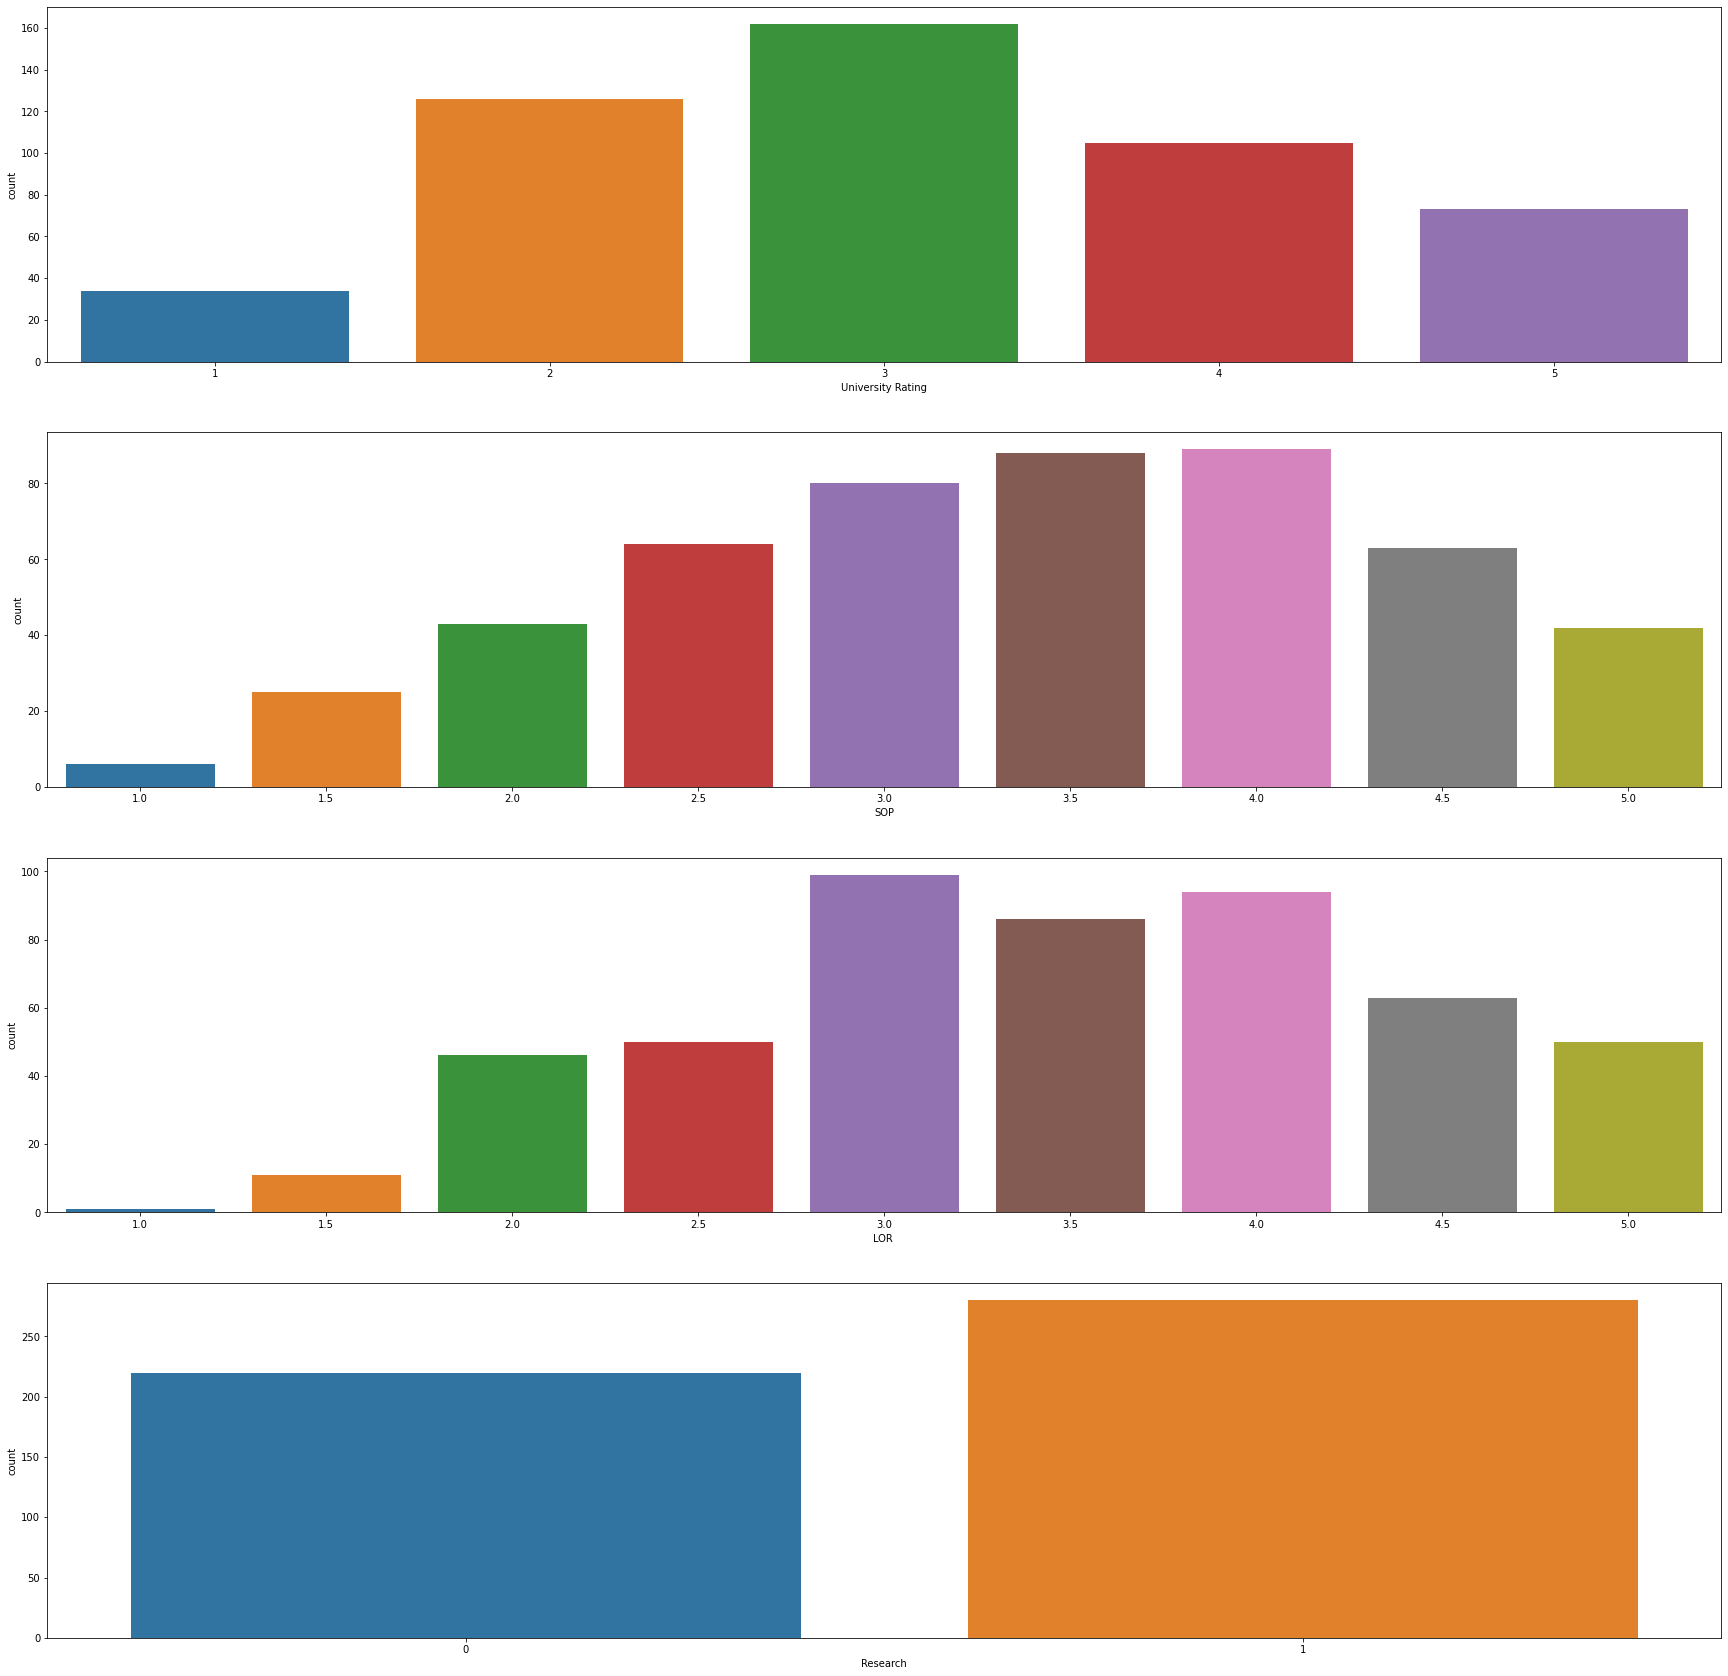

In [184]:
fig, ax = plt.subplots(len(cat_columns) , 1 , figsize = (30,30))
for i in range(len(cat_columns)):
    sns.countplot(df[cat_columns[i]] ,ax  = ax[i])

### Insight :
### 32% of students have got 3 in the university Rating section
### 6.8% of students have got 1 in University Rating
### Almost 34% of students have recieved 3.5 and 4 in SOP Section, only a few students have got 1
### 56% of students have research experience

In [181]:
for i in cat_columns:
    print("Column Name :" , i)
    print(df[i].value_counts(normalize = True)*100)

Column Name : University Rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64
Column Name : SOP
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64
Column Name : LOR 
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
5.0    10.0
2.5    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR , dtype: float64
Column Name : Research
1    56.0
0    44.0
Name: Research, dtype: float64


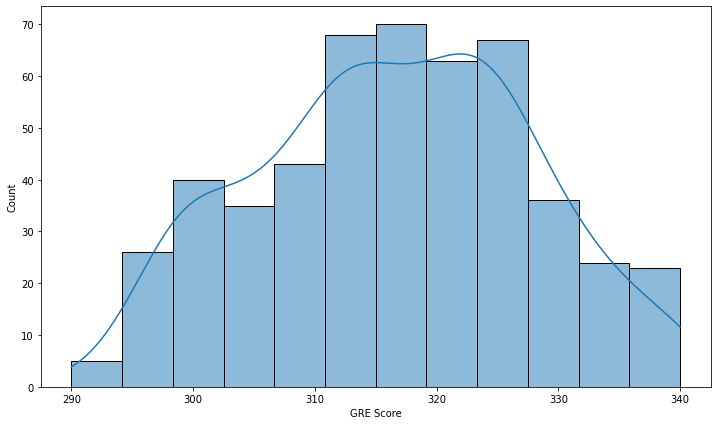

In [173]:
plt.figure(figsize = (12,7))
sns.histplot(df["GRE Score"], kde = True)

In [165]:
continous_columns

['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

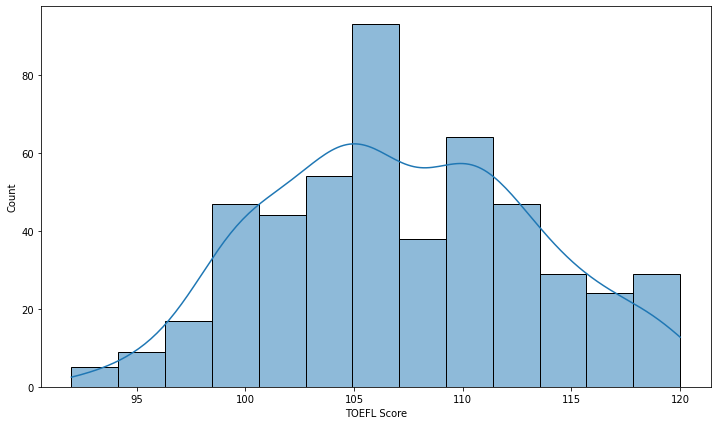

In [177]:
plt.figure(figsize = (12,7))
sns.histplot(df["TOEFL Score"], kde = True)

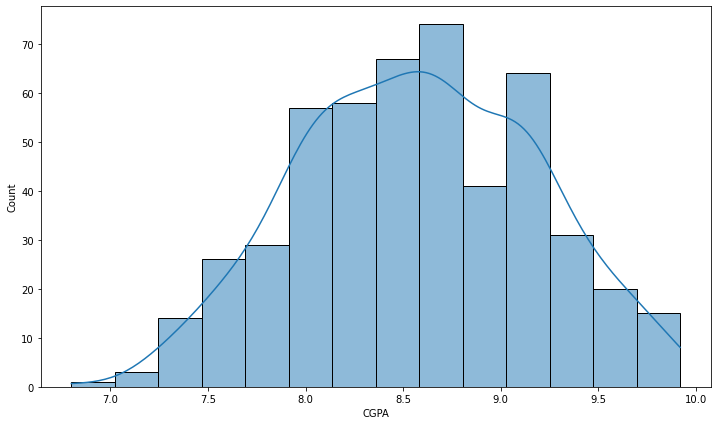

In [176]:
plt.figure(figsize = (12,7))
sns.histplot(df["CGPA"], kde = True)

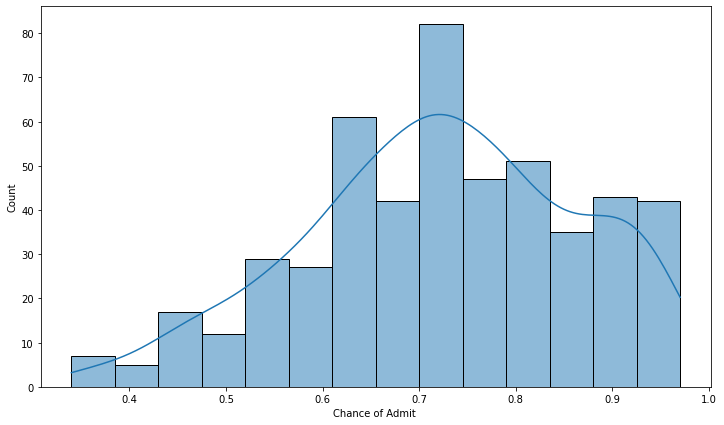

In [179]:
plt.figure(figsize = (12,7))
sns.histplot(df["Chance of Admit "], kde = True)

### Insight : There is a variety of distributions for the continuous columns. 
### This infers that merits of student vary in the data set.

# Outlier Detection

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

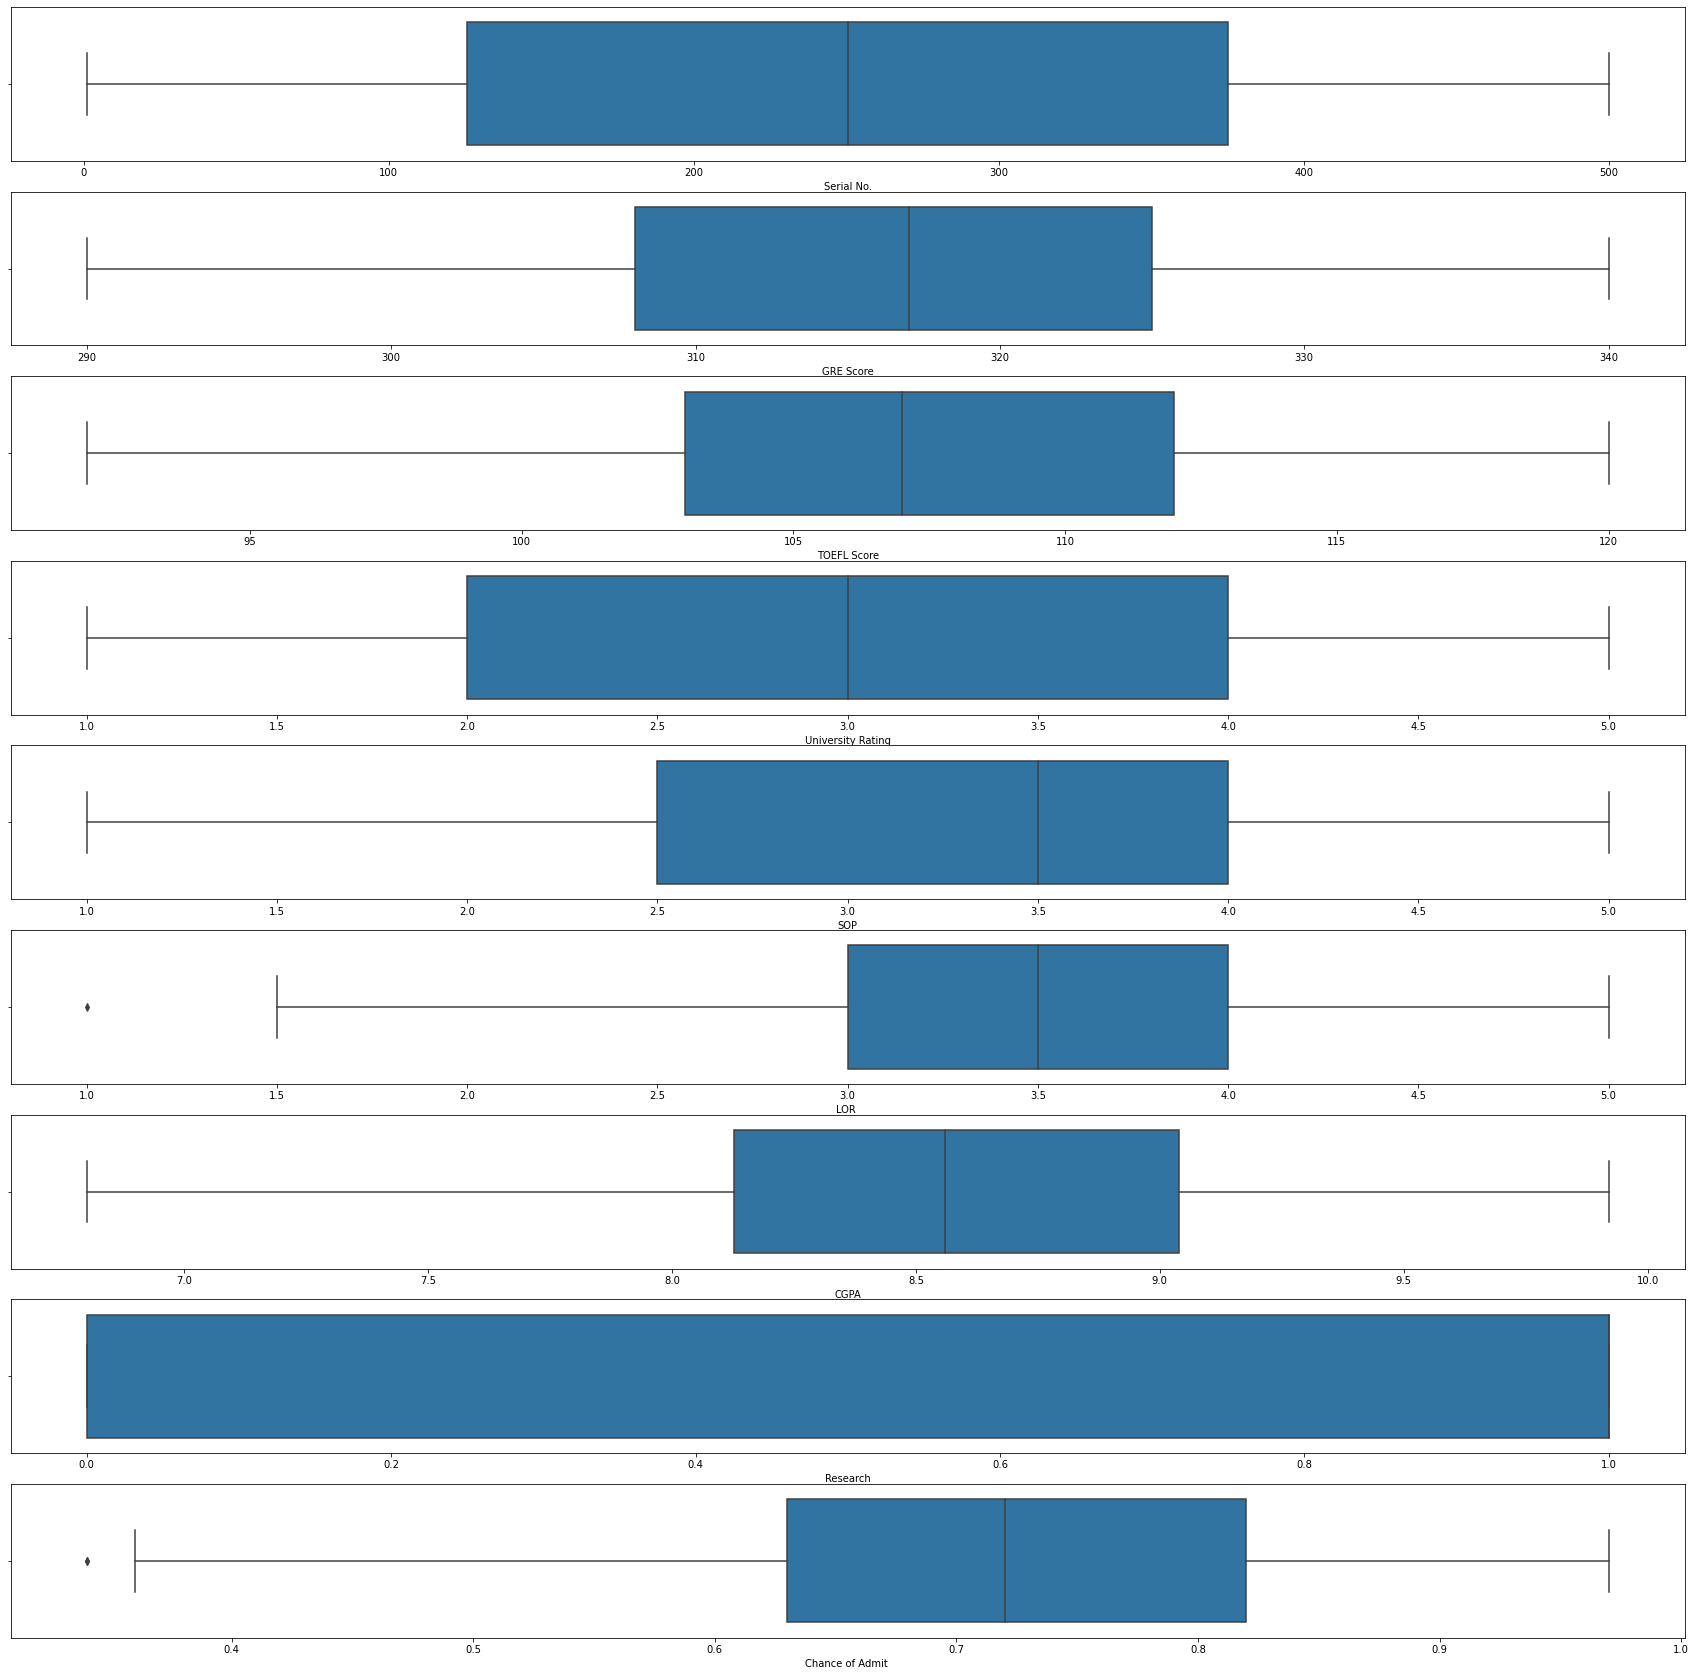

In [203]:
fig, ax = plt.subplots(len(columns) , 1 , figsize = (30,30))
for i in range(len(columns)):
    sns.boxplot(df[columns[i]] , ax  = ax[i])

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


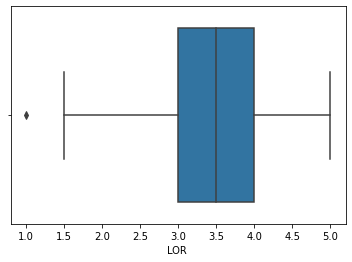

In [190]:
sns.boxplot(df["LOR "])

In [193]:
df[df["LOR "]<1.5]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


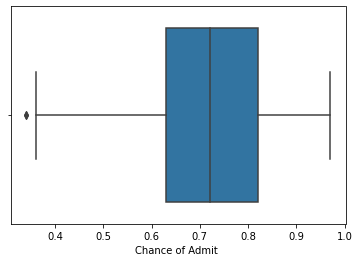

In [204]:
sns.boxplot(df["Chance of Admit "])

### Inights : There were no outliers in the columns.

# Bivariate Analysis

In [198]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


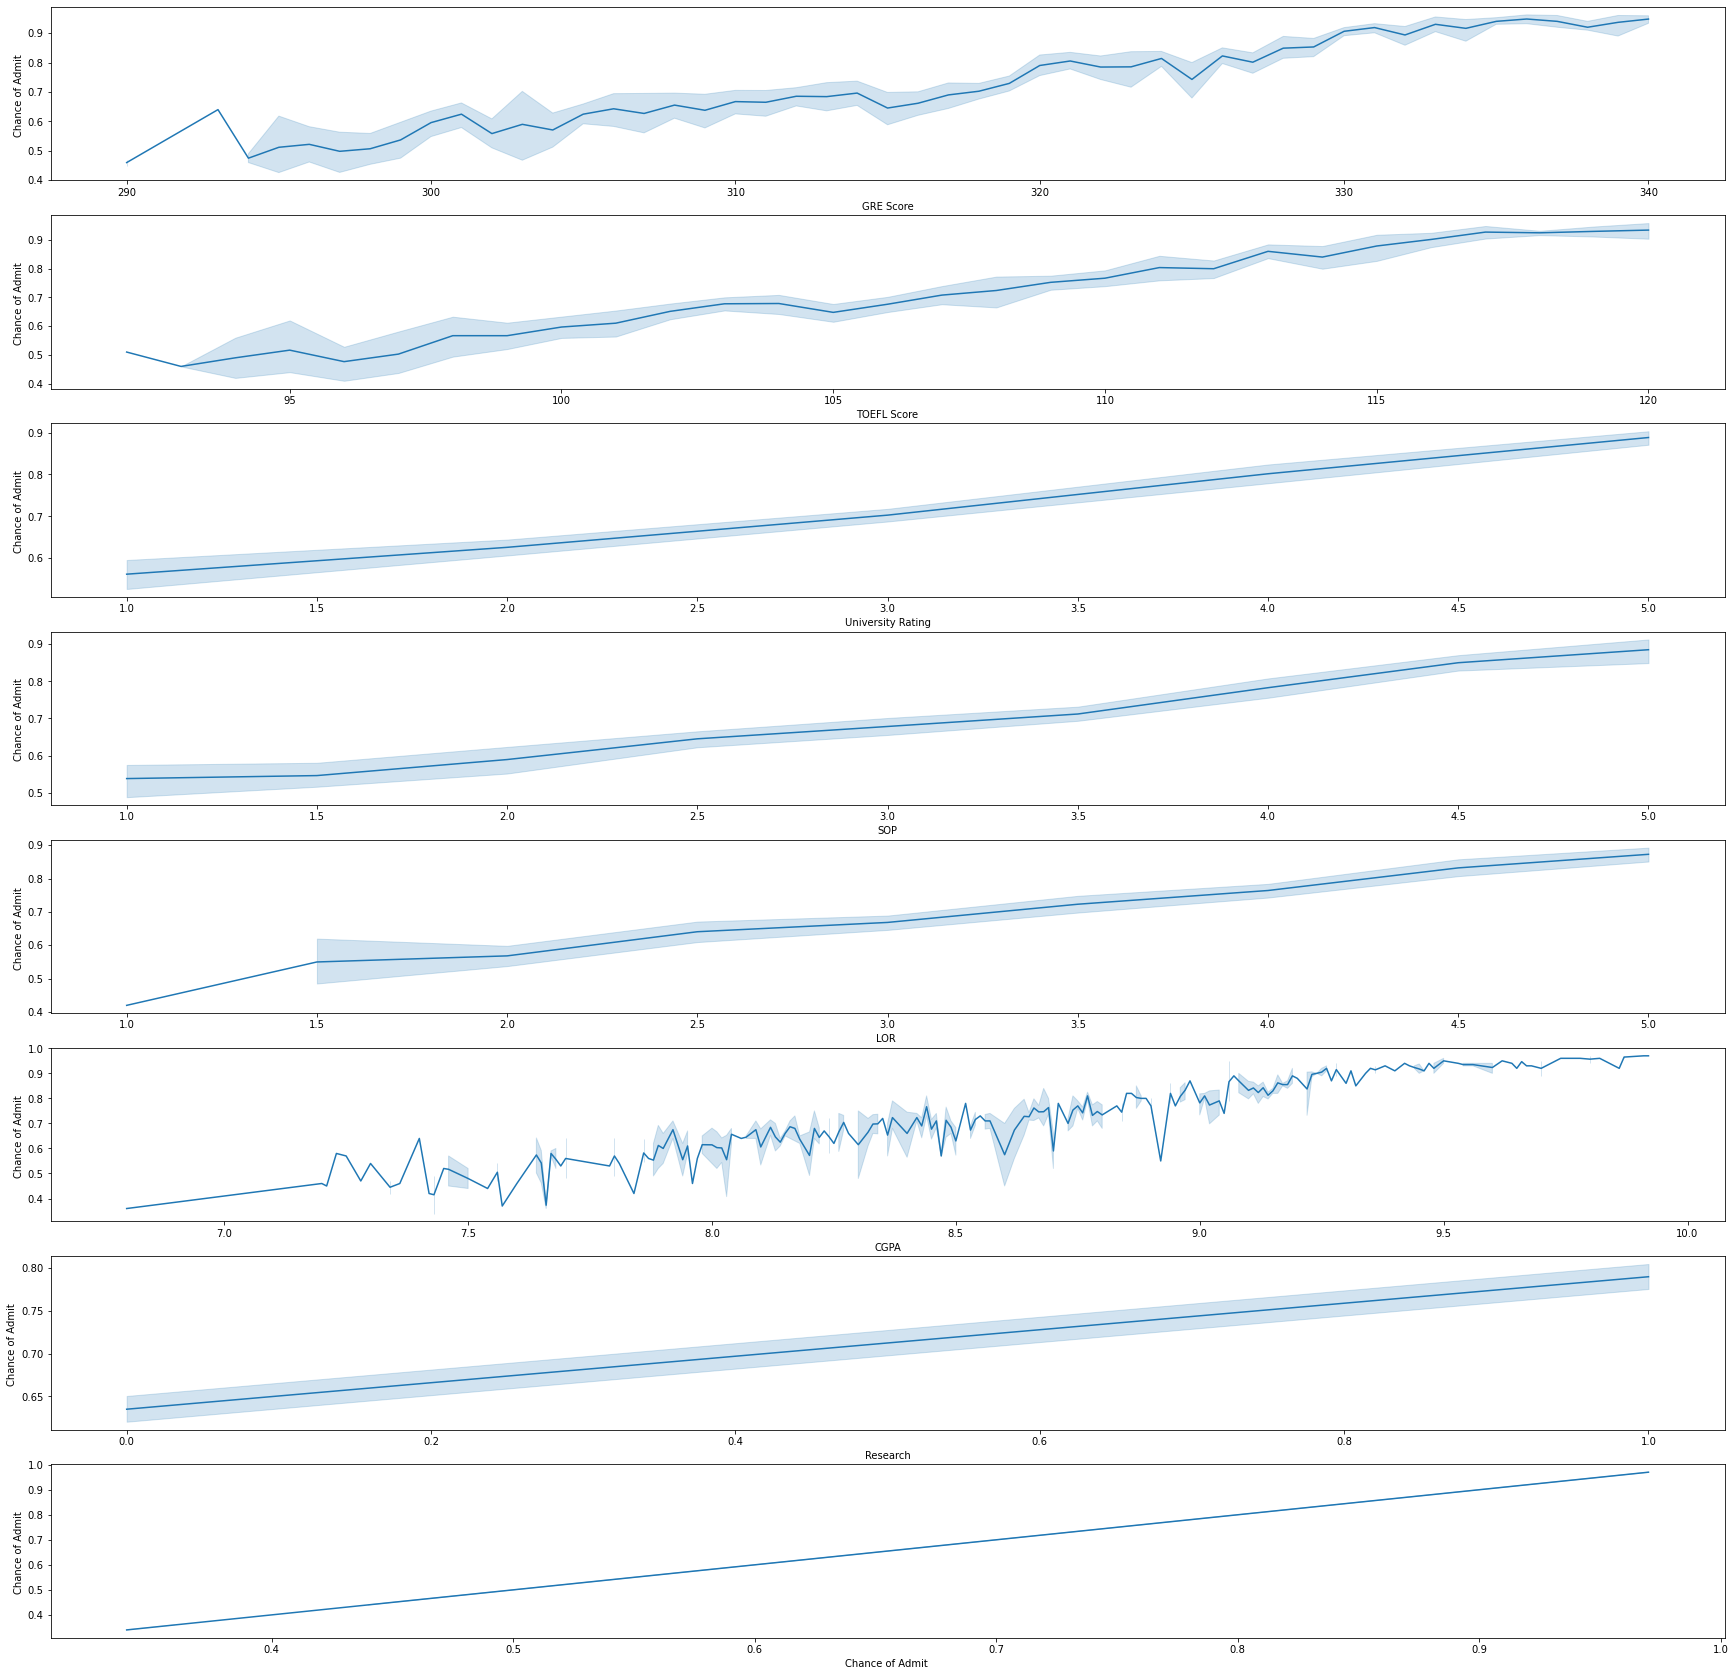

In [209]:
fig, ax = plt.subplots(len(columns[1:]) , 1 , figsize = (30,30))
for i in range(len(columns[1:])):
    sns.lineplot(x = df[columns[1+i]], y = df["Chance of Admit "] , ax  = ax[i])

### Insights : All the columns show linear relationship with the Target Variable.

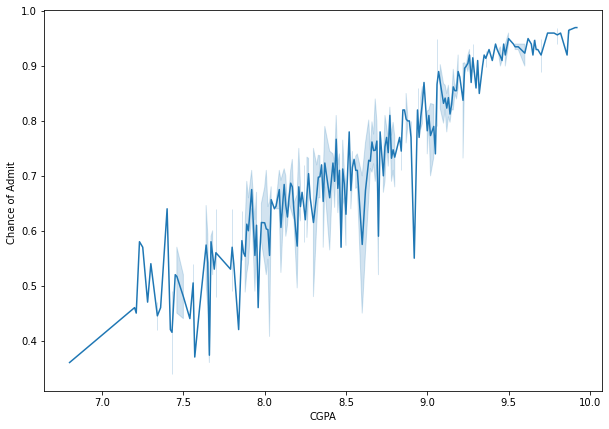

In [213]:
plt.figure(figsize=(10,7))
sns.lineplot(x = df["CGPA"] , y = df["Chance of Admit "])

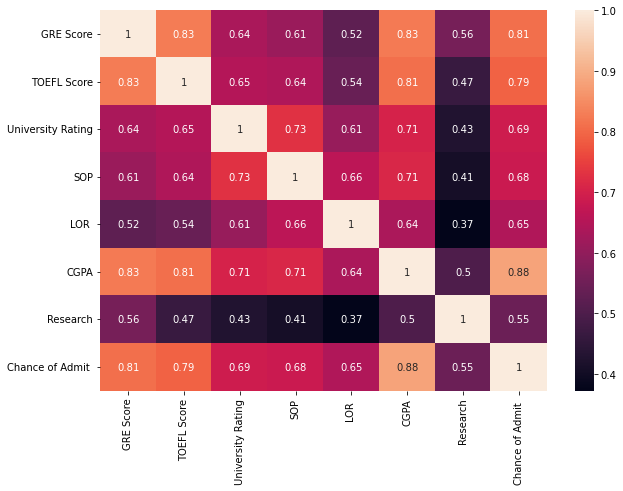

In [290]:
plt.figure(figsize = (10,7))
sns.heatmap(df[columns[1:]].corr(),annot=True)

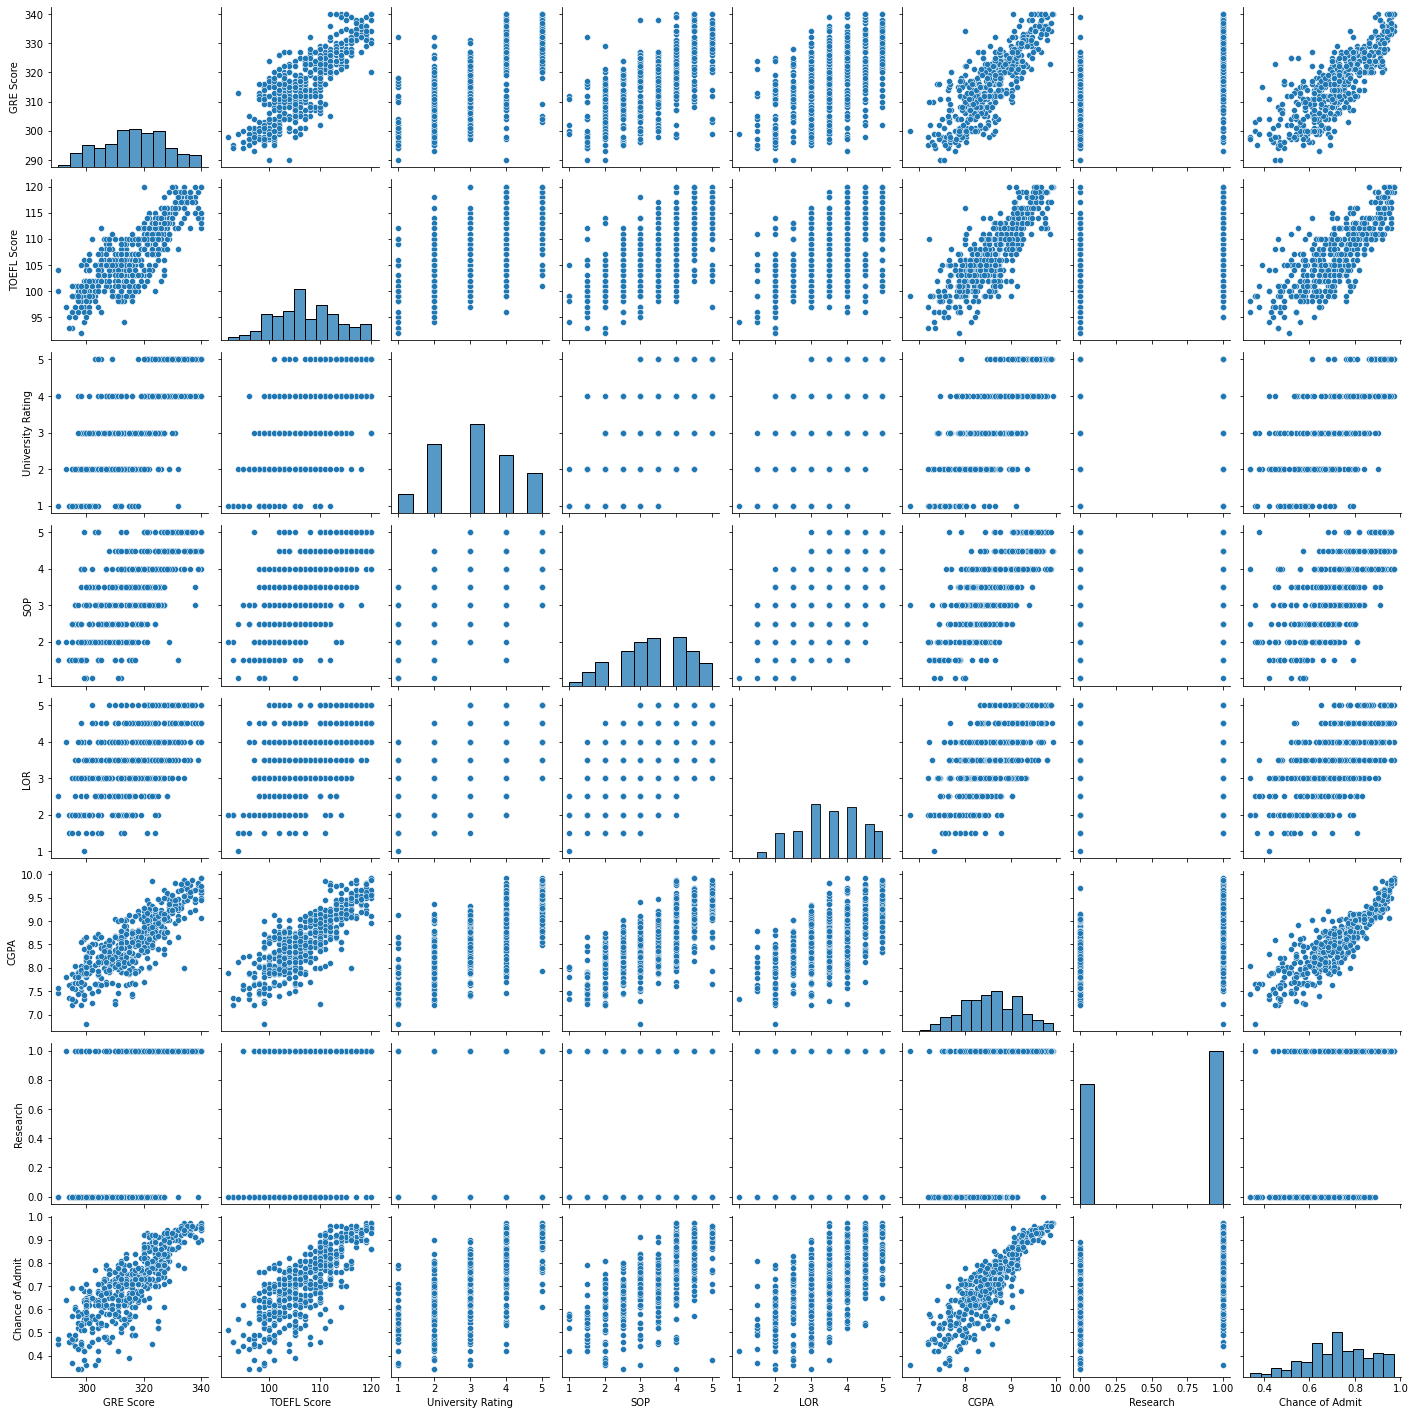

In [214]:
sns.pairplot(df[columns[1:]])

### It is observed that there is high co-relation among the columns

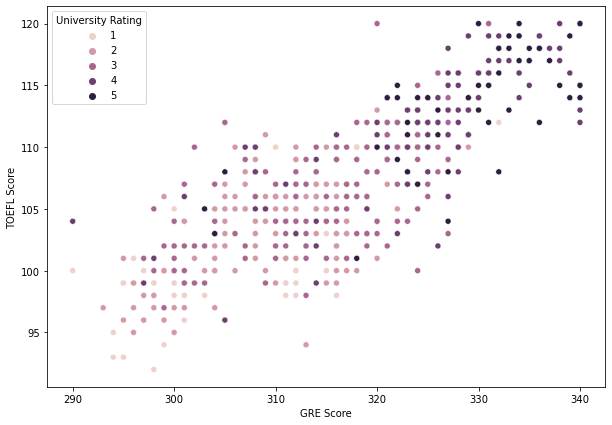

In [456]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df["GRE Score"] , y = df["TOEFL Score"] , hue = df["University Rating"])

## Applicants with high TOEFL and GRE score have got highest university ratings

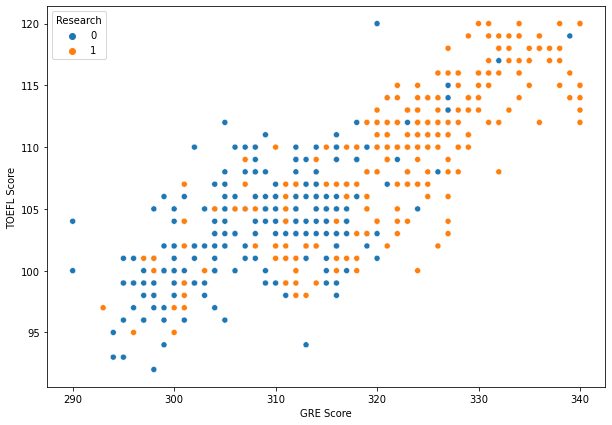

In [226]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df["GRE Score"] , y = df["TOEFL Score"] , hue = df["Research"])

## Applicants with high TOEFL and GRE score have higher research experience

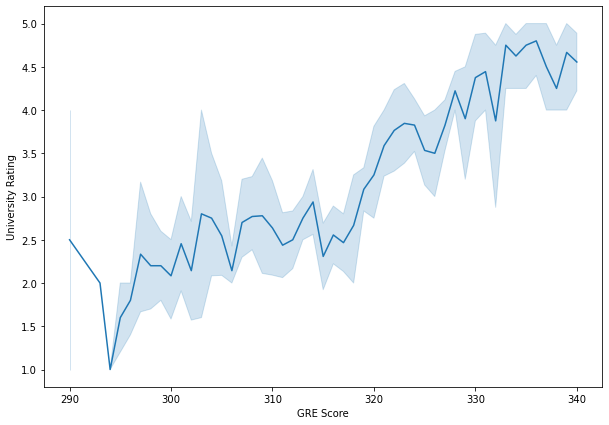

In [233]:
plt.figure(figsize=(10,7))


sns.lineplot(x = df["GRE Score"] , y = df["University Rating"])

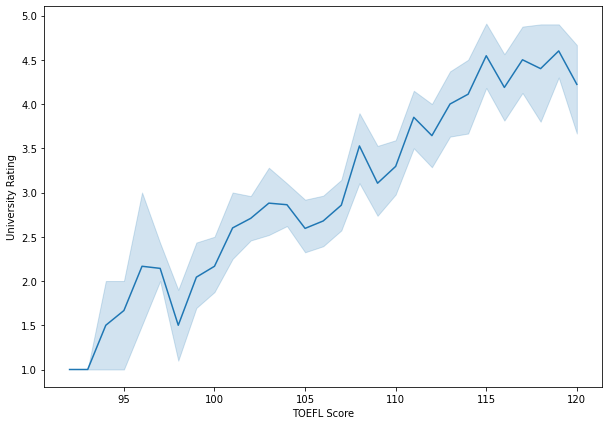

In [234]:
plt.figure(figsize=(10,7))


sns.lineplot(x = df["TOEFL Score"] , y = df["University Rating"])

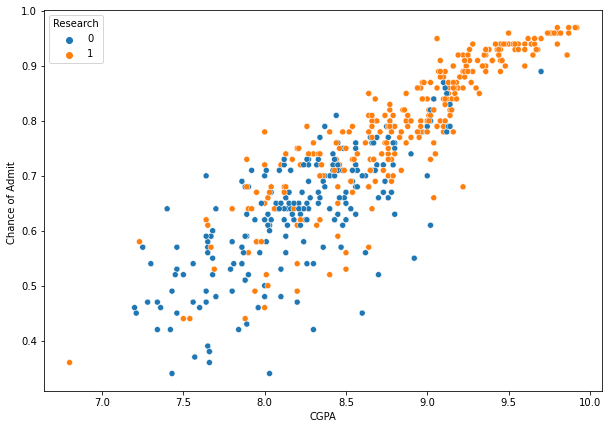

In [229]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df["CGPA"] , y = df["Chance of Admit "] , hue = df["Research"])

### Higher probability of students to crack universities , when the cgpa is high and they have research experience

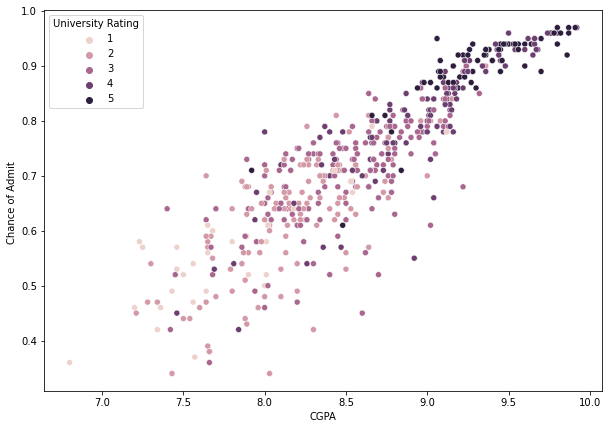

In [230]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df["CGPA"] , y = df["Chance of Admit "] , hue = df["University Rating"])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [241]:
pd.crosstab(index = df["University Rating"] , columns=df["Research"] , normalize=True , margins=True)*100

Research,0,1,All
University Rating,,,
1,4.8,2.0,6.8
2,17.8,7.4,25.2
3,15.0,17.4,32.4
4,4.6,16.4,21.0
5,1.8,12.8,14.6
All,44.0,56.0,100.0


In [244]:
pd.crosstab(index = df["University Rating"] , columns=df["LOR "] , normalize = True)*100

LOR,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
University Rating,,,,,,,,,
1,0.2,1.0,2.2,1.0,1.4,0.6,0.4,0.0,0.0
2,0.0,1.0,4.4,3.8,6.8,5.4,3.4,0.4,0.0
3,0.0,0.2,2.0,3.2,9.6,6.8,6.4,2.6,1.6
4,0.0,0.0,0.6,2.0,1.4,2.8,5.2,6.2,2.8
5,0.0,0.0,0.0,0.0,0.6,1.6,3.4,3.4,5.6


# DATA PROCESSING

## Data Duplication Check

In [251]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


## Missing Value Treatment

In [249]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Preparing Data for Modelling

In [281]:
new_df = df.copy()

In [282]:
new_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## ASSUMPTIONS FOR LINEAR REGRESSION
### 1. Linearity 
### As we have already seen, all the columns show linearity with the target column i.e Chance of Admit.

### 2. Normality of the Target Variable

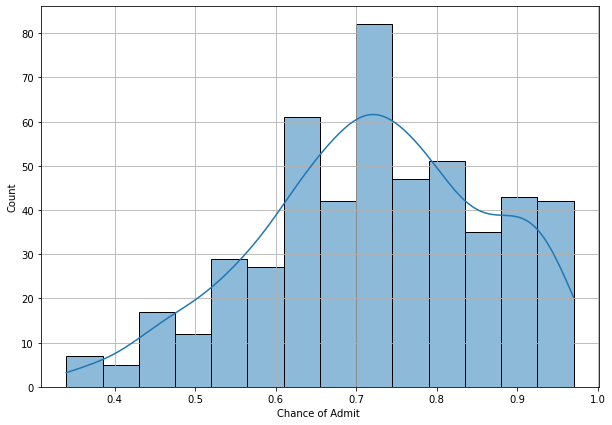

In [287]:
plt.figure(figsize = (10,7))
sns.histplot(df["Chance of Admit "] , kde = True)
plt.grid()

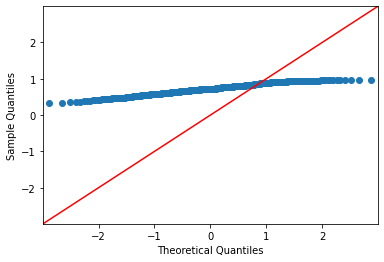

In [288]:
import statsmodels.api as sm
import pylab as py  
sm.qqplot(df["Chance of Admit "], line ='45')
py.show()

In [ ]:
#how to plot qqplot

### Performing Shapiro-Wilk Test

### Ho : Distribution is Normal
### Ha : Distribution is not Normal

In [291]:
from scipy.stats import shapiro 
shapiro(df["Chance of Admit "])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.654237050592201e-06)

### Since the Pvalue is greater then 0.05 , we fail to reject the null hypothesis.
 
### Conclusion:
### Target variable is normally distributed.

### Splitting the data for Test and Train

In [349]:
X = new_df.drop(["Serial No." , "Chance of Admit "] , axis = 1)

In [350]:
y = new_df["Chance of Admit "]

In [351]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [352]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100, shuffle=True)

In [394]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
x_columns =X_train.columns
X_train =standard.fit_transform(X_train)

In [395]:
X_train = pd.DataFrame(X_train , columns= x_columns)


In [396]:
X_test = standard.fit_transform(X_test)
X_test

array([[ 1.02731163,  1.28491463,  0.74437783, ...,  0.57766723,
         1.00801211,  0.92295821],
       [-0.56313642, -1.2700109 , -0.97341717, ..., -1.47322233,
        -1.9087622 , -1.08347268],
       [-0.4747782 , -0.63127952, -0.11451967, ...,  0.57766723,
        -0.6699172 , -1.08347268],
       ...,
       [-1.8885098 , -1.2700109 , -1.83231467, ..., -1.98594472,
        -1.48535948, -1.08347268],
       [ 1.11566986,  1.12523179, -0.97341717, ...,  0.57766723,
         0.06711717,  0.92295821],
       [ 1.02731163,  0.16713471,  0.74437783, ...,  0.57766723,
         1.03937528,  0.92295821]])

### Performing Linear Regression 

In [397]:
from sklearn.metrics import mean_squared_error,r2_score

In [398]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [399]:
lr.fit(X_train, y_train.values)

LinearRegression()

In [400]:
y_pred = lr.predict(X_test)

In [401]:
print(r2_score(y_test, y_pred))

0.8429230560323886


In [402]:
print(mean_squared_error(y_test, y_pred))

0.003256725845782807


In [403]:
lr.coef_,lr.intercept_

(array([0.01273122, 0.02104744, 0.00593204, 0.000534  , 0.01552633,
        0.07488036, 0.01366563]),
 0.7224285714285718)

In [404]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     212.8
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          1.71e-120
Time:                        23:03:20   Log-Likelihood:                 485.93
No. Observations:                 350   AIC:                            -955.9
Df Residuals:                     342   BIC:                            -925.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7224      0.00

In [383]:
# This gives us an insight where SOP is insignificant for the Target Variable

In [405]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,const,1.000000
1,GRE Score,4.758360
2,TOEFL Score,3.726722
3,University Rating,2.482060
4,SOP,2.733400
5,LOR,1.970183
6,CGPA,4.705215
7,Research,1.486937


In [406]:
X_train.drop("SOP" , axis = 1 , inplace = True)


In [418]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model_new = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     248.9
Date:                Fri, 06 Jan 2023   Prob (F-statistic):          1.05e-121
Time:                        23:06:30   Log-Likelihood:                 485.93
No. Observations:                 350   AIC:                            -957.9
Df Residuals:                     343   BIC:                            -930.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7224      0.00

In [409]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)for i in range(len(X_train.columns))]
vif_data

,feature,VIF
0,const,1.000000
1,GRE Score,4.757002
2,TOEFL Score,3.706181
3,University Rating,2.172865
4,LOR,1.787886
5,CGPA,4.539564
6,Research,1.484278


In [413]:
len(x_columns)

7

In [414]:
X_test = pd.DataFrame(X_test , columns = x_columns)

In [416]:
X_test.drop("SOP" , axis  =1 , inplace = True)

In [422]:
X_test = sm.add_constant(X_test)

In [423]:
y_pred_new = model_new.predict(X_test)

In [424]:
r2_score(y_test.values, y_pred_new)

0.8428631061667798

In [425]:
mean_squared_error(y_test.values, y_pred_new)

0.0032579688052639865

In [428]:
residual = y_test.values - y_pred_new

# Residual Normality 

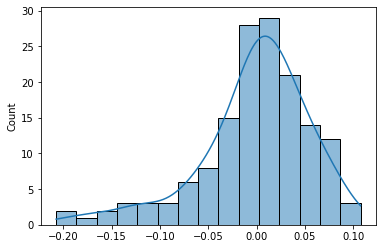

In [431]:
sns.histplot(residual , kde = True)

In [435]:
np.mean(residual)

-0.00229523809523817

# Test Homoscadicity 

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


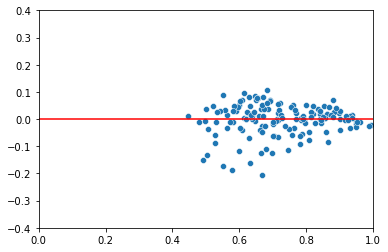

In [449]:
sns.scatterplot(x = y_pred_new , y = residual)
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
sns.lineplot(x= [0,10] , y = [0,0], c = "r")

# The figure implies that it is Hetroscadastic 

/Users/arjunarora/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


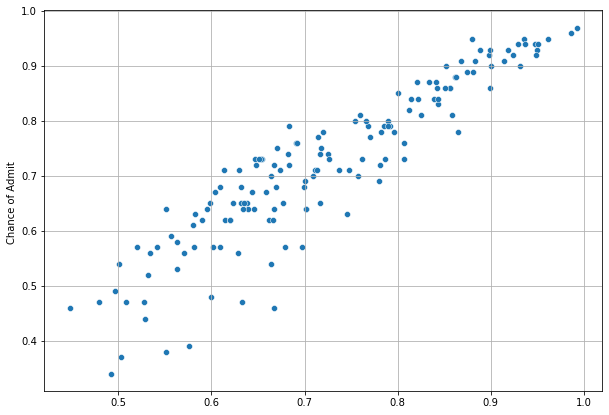

In [451]:
plt.figure(figsize = (10,7))
sns.scatterplot(y_pred, y_test)
plt.grid()

# Please refer to the word documents for all insights and recommendations